<a href="https://colab.research.google.com/github/Jakelinecs/Tareas-Machine-Learning/blob/main/N9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)

fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)


In [13]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


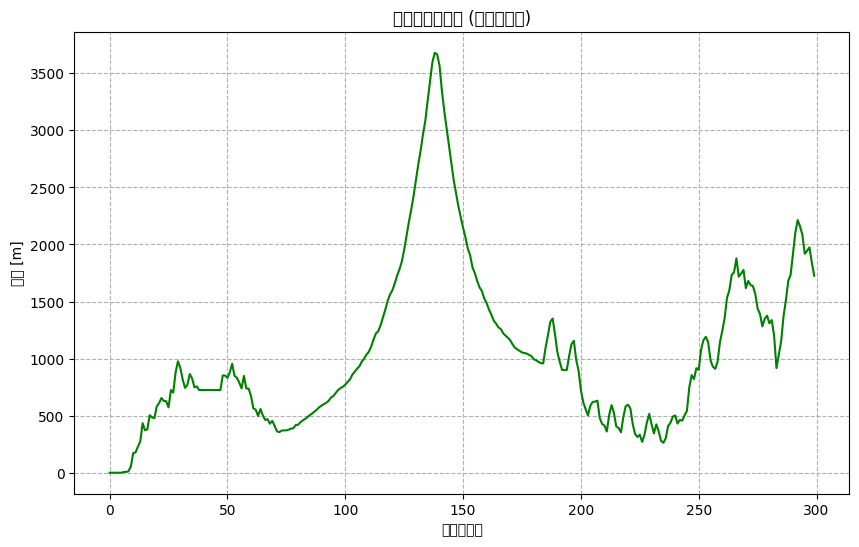

In [15]:
elevation = fuji[:, 3]
point_number = fuji[:, 0]

plt.figure(figsize=(10, 6))
plt.plot(point_number, elevation, color='green')
plt.title('富士山の断面図 (標高データ)')
plt.xlabel('地点の番号')
plt.ylabel('標高 [m]')
plt.grid(True, linestyle='--')
plt.show()

In [16]:
################################################################################

In [18]:
def calculate_gradient(point_index, fuji_data):
    if point_index <= 0 or point_index >= len(fuji_data):
        return np.nan

    y_current = fuji_data[point_index, 3]
    y_previous = fuji_data[point_index - 1, 3]

    x_current = fuji_data[point_index, 0]
    x_previous = fuji_data[point_index - 1, 0]

    gradient = (y_current - y_previous) / (x_current - x_previous)

    return gradient

test_point = 136
test_gradient = calculate_gradient(test_point, fuji)
print(f"\n--- 【問題2】勾配計算のテスト ---")
print(f"地点 {test_point} の勾配: {test_gradient:.4f}")


--- 【問題2】勾配計算のテスト ---
地点 136 の勾配: 168.3500


In [19]:
################################################################################

In [20]:
def calculate_next_point(current_point_index, gradient, alpha=0.2, data_len=len(fuji)):
    next_point_float = current_point_index - alpha * gradient

    next_point_index = int(np.round(next_point_float))

    if next_point_index < 0:
        next_point_index = 0
    elif next_point_index >= data_len:
        next_point_index = data_len - 1

    return next_point_index

test_next_point = calculate_next_point(test_point, test_gradient, alpha=0.2)
print(f"\n--- 【問題3】移動先計算のテスト (α=0.2) ---")
print(f"地点 {test_point} からの移動先: {test_next_point}")


--- 【問題3】移動先計算のテスト (α=0.2) ---
地点 136 からの移動先: 102


In [21]:
################################################################################

In [22]:
def calculate_next_point(current_point_index, gradient, alpha=0.2, data_len=len(fuji)):
    next_point_float = current_point_index - alpha * gradient

    next_point_index = int(np.round(next_point_float))

    if next_point_index < 0:
        next_point_index = 0
    elif next_point_index >= data_len:
        next_point_index = data_len - 1

    return next_point_index

test_next_point = calculate_next_point(test_point, test_gradient, alpha=0.2)
print(f"\n--- 【問題3】移動先計算のテスト (α=0.2) ---")
print(f"地点 {test_point} からの移動先: {test_next_point}")


--- 【問題3】移動先計算のテスト (α=0.2) ---
地点 136 からの移動先: 102


In [23]:
################################################################################

In [24]:
def descend_fuji(start_point, fuji_data, alpha=0.2):

    current_point = start_point
    descent_path = [current_point]

    data_len = len(fuji_data)

    while True:
        if current_point <= 0:
            break

        gradient = calculate_gradient(current_point, fuji_data)

        next_point = calculate_next_point(current_point, gradient, alpha, data_len)

        if next_point == current_point:
            break

        current_point = next_point
        descent_path.append(current_point)

    return descent_path

initial_point = 136
path_136_a02 = descend_fuji(initial_point, fuji, alpha=0.2)

print(f"\n--- 【問題4】地点136からの下山 (α=0.2) ---")
print(f"下山経路 (地点番号):\n{path_136_a02}")
print(f"最終地点: {path_136_a02[-1]}")


--- 【問題4】地点136からの下山 (α=0.2) ---
下山経路 (地点番号):
[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
最終地点: 75
